In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


<h4> Reading the Datasets </h4>

In [ ]:

path='https://raw.githubusercontent.com/krishnaik06/The-Grand-Complete-Data-Science-Materials/main/Machine%20Learning/002-random-forest-example/mobile_ads.csv'
df = pd.read_csv(path)


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<span> One of the columns has datatype object  i.e "categorical column" and the other are of discrete values
 "int"</span>

In [ ]:
df.shape

(400, 5)

In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop_duplicates() #dropped the duplicated values if any

In [ ]:
df.Purchased.value_counts() #boolean metric

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.nunique()  #cardinality test


User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

<h4>Visualizing for better consideration </h4>


Text(0.5, 1.0, 'Target distribution')

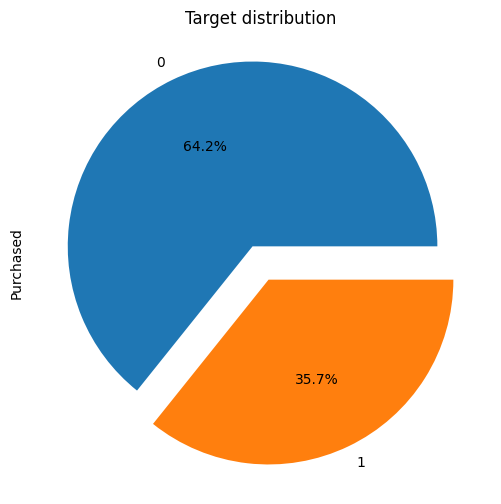

In [ ]:
plt.figure(figsize=(6,6))

# Pie plot
df['Purchased'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%').set_title("Target distribution")

- target is inbalanced accross the population
- we can consider to under sample the majority or over sample the minority :
-  the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class.


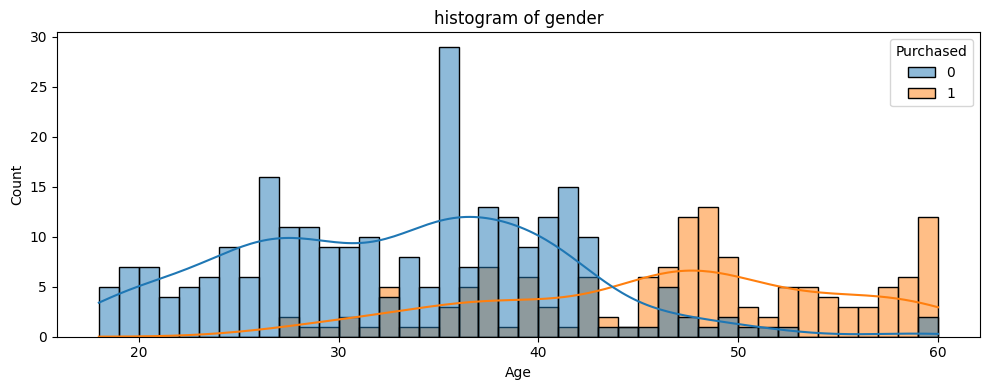

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age',hue='Purchased',binwidth=1,kde=1)
plt.title("histogram of gender")
plt.tight_layout()
plt.show()

- age below 30 were less likely to purchase than not
- age more than 45-60 were more likely to purchase or not
insight :
    - can create a feature for age ranges adult , adolescent or teen but not that necessary

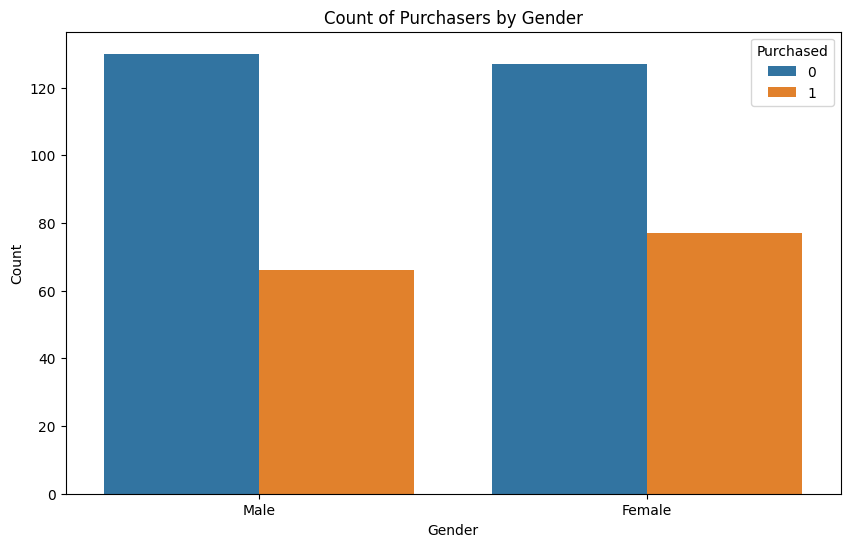

In [ ]:
# gender propotion in purchasing
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Count of Purchasers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

as seen from the histogram the propotion is very much equally distributed in both of the genders

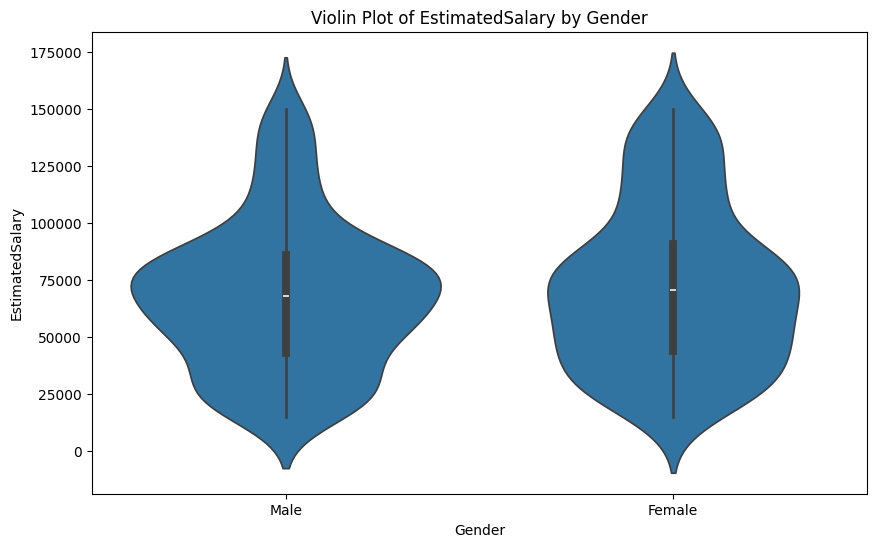

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.title('Violin Plot of EstimatedSalary by Gender')
plt.xlabel('Gender')
plt.ylabel('EstimatedSalary')
plt.show()

#salary is also equally distributed through out not need to check further

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['GenderEncode'] = le.fit_transform(df.Gender)



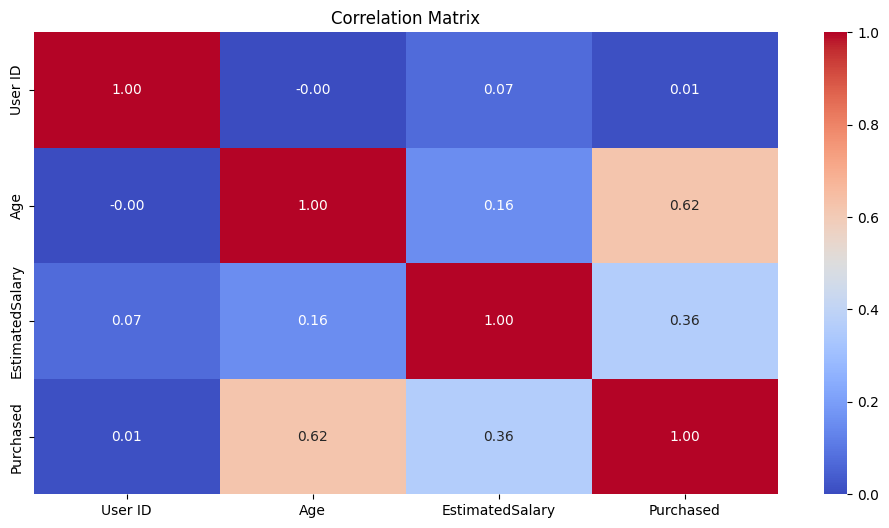

In [ ]:
# Assuming 'Gender' is a categorical variable encoded as integers
# If 'Gender' is not numerical, use appropriate correlation metrics for categorical data

# Drop the 'Gender' column for the correlation matrix
copydf = df.drop(['Gender'], axis=1)

# Form the correlation matrix
corrmat = copydf.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=corrmat, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


two metrics as we can see gives us a good realation to the purchase i.e age and estimated salary lets use those and implement the model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def randomforest(X_train,X_test,y_train,y_test):
    rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

    # Train the model on the training data
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

def xgb(X_train,X_test,y_train,y_test):
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [150, 180, 220],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Instantiate the XGBClassifier
    xgb_classifier = XGBClassifier(random_state=42)

    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Make predictions on the test data using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
from sklearn.metrics import accuracy_score

x = df.drop(['Purchased','Gender','User ID'],axis=1)
y = df['Purchased']

xtrain , xtest , ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print("randomforest ")
randomforest(xtrain,xtest,ytrain,ytest)
print("XGBClassifier")
xgb(xtrain,xtest,ytrain,ytest)



randomforest 
Test Accuracy: 0.8500
XGBClassifier
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.9}
Test Accuracy: 0.8875


based on that the XGBClassifier is performing the best out of those in this and giving us an accuracy of **<p style="color: red;">88.75 </p>**
